In [1]:
import cv2
import os
import skimage
from skimage import data
from skimage import transform
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
from scipy import ndimage, misc
from skimage.transform import rotate
HEIGHT=28
WIDTH=28
class_number = 10
class_image_number =5500
NUMBEROFIMAGE_DATA = class_number * class_image_number
totalImages = 0

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(str(d))
    return images, labels

In [3]:
ROOT_PATH = '/home/tang/mnistTransformation/'
train_data_directory = os.path.join(ROOT_PATH, "exp2/1")
#test_data_directory = os.path.join(ROOT_PATH, "outPut/val")

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets('MNIST_data',one_hot = True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
mnistNoOnehot = input_data.read_data_sets('MNIST_data')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
X_train = mnist.train.images*255
Y_train = mnist.train.labels
X_val = mnist.validation.images*255
Y_val = mnist.validation.labels
X_test = mnist.test.images*255
Y_test = mnist.test.labels


In [8]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(X_train)))
print("- Validation-set:\t{}".format(len(X_val)))
print("- Test-set:\t\t{}".format(len(X_test)))

Size of:
- Training-set:		55000
- Validation-set:	5000
- Test-set:		10000


In [9]:
X_train_reshape = np.reshape(X_train,(55000,28,28))
Y_train_reshape = mnistNoOnehot.train.labels
X_test_reshape = np.reshape(X_test,(10000,28,28))
Y_test_reshape = mnistNoOnehot.test.labels
X_val_reshape = np.reshape(X_val,(5000,28,28))
Y_val_reshape = mnistNoOnehot.validation.labels

In [10]:
#plt.imshow(X_test_reshape[0])

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

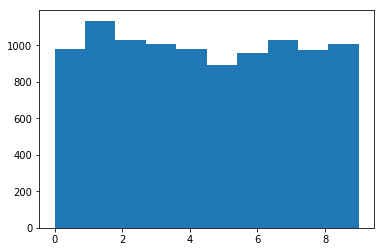

In [11]:
plt.hist(Y_test_reshape,10)

In [12]:
len(Y_test_reshape)

10000

In [13]:
random_pickup_array = []



In [14]:
Y_test_reshape

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
unique_labels = set(Y_test_reshape)

In [16]:
unique_labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [17]:
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

<Figure size 1080x1080 with 0 Axes>

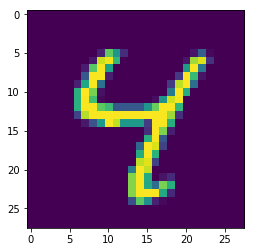

In [18]:
plt.imshow(X_test_reshape[6])

In [19]:
Images = X_train_reshape
Labels = Y_train_reshape

In [20]:
for x in range(0,5500):
    img = Images[x]
    filename=train_data_directory+'/'+str(Labels[x])+'/'+str(Labels[x])+'-'+str(x)+'.jpg'
    plt.imsave(filename,img)
    print(filename)
    
    

/home/tang/mnistTransformation/exp2/1/7/7-0.jpg
/home/tang/mnistTransformation/exp2/1/3/3-1.jpg
/home/tang/mnistTransformation/exp2/1/4/4-2.jpg
/home/tang/mnistTransformation/exp2/1/6/6-3.jpg
/home/tang/mnistTransformation/exp2/1/1/1-4.jpg
/home/tang/mnistTransformation/exp2/1/8/8-5.jpg
/home/tang/mnistTransformation/exp2/1/1/1-6.jpg
/home/tang/mnistTransformation/exp2/1/0/0-7.jpg
/home/tang/mnistTransformation/exp2/1/9/9-8.jpg
/home/tang/mnistTransformation/exp2/1/8/8-9.jpg
/home/tang/mnistTransformation/exp2/1/0/0-10.jpg
/home/tang/mnistTransformation/exp2/1/3/3-11.jpg
/home/tang/mnistTransformation/exp2/1/1/1-12.jpg
/home/tang/mnistTransformation/exp2/1/2/2-13.jpg
/home/tang/mnistTransformation/exp2/1/7/7-14.jpg
/home/tang/mnistTransformation/exp2/1/0/0-15.jpg
/home/tang/mnistTransformation/exp2/1/2/2-16.jpg
/home/tang/mnistTransformation/exp2/1/9/9-17.jpg
/home/tang/mnistTransformation/exp2/1/6/6-18.jpg
/home/tang/mnistTransformation/exp2/1/0/0-19.jpg
/home/tang/mnistTransformation

/home/tang/mnistTransformation/exp2/1/9/9-209.jpg
/home/tang/mnistTransformation/exp2/1/5/5-210.jpg
/home/tang/mnistTransformation/exp2/1/5/5-211.jpg
/home/tang/mnistTransformation/exp2/1/9/9-212.jpg
/home/tang/mnistTransformation/exp2/1/6/6-213.jpg
/home/tang/mnistTransformation/exp2/1/7/7-214.jpg
/home/tang/mnistTransformation/exp2/1/8/8-215.jpg
/home/tang/mnistTransformation/exp2/1/2/2-216.jpg
/home/tang/mnistTransformation/exp2/1/4/4-217.jpg
/home/tang/mnistTransformation/exp2/1/6/6-218.jpg
/home/tang/mnistTransformation/exp2/1/9/9-219.jpg
/home/tang/mnistTransformation/exp2/1/8/8-220.jpg
/home/tang/mnistTransformation/exp2/1/1/1-221.jpg
/home/tang/mnistTransformation/exp2/1/6/6-222.jpg
/home/tang/mnistTransformation/exp2/1/7/7-223.jpg
/home/tang/mnistTransformation/exp2/1/9/9-224.jpg
/home/tang/mnistTransformation/exp2/1/1/1-225.jpg
/home/tang/mnistTransformation/exp2/1/6/6-226.jpg
/home/tang/mnistTransformation/exp2/1/2/2-227.jpg
/home/tang/mnistTransformation/exp2/1/0/0-228.jpg


/home/tang/mnistTransformation/exp2/1/6/6-419.jpg
/home/tang/mnistTransformation/exp2/1/2/2-420.jpg
/home/tang/mnistTransformation/exp2/1/2/2-421.jpg
/home/tang/mnistTransformation/exp2/1/7/7-422.jpg
/home/tang/mnistTransformation/exp2/1/5/5-423.jpg
/home/tang/mnistTransformation/exp2/1/5/5-424.jpg
/home/tang/mnistTransformation/exp2/1/1/1-425.jpg
/home/tang/mnistTransformation/exp2/1/9/9-426.jpg
/home/tang/mnistTransformation/exp2/1/7/7-427.jpg
/home/tang/mnistTransformation/exp2/1/1/1-428.jpg
/home/tang/mnistTransformation/exp2/1/1/1-429.jpg
/home/tang/mnistTransformation/exp2/1/8/8-430.jpg
/home/tang/mnistTransformation/exp2/1/8/8-431.jpg
/home/tang/mnistTransformation/exp2/1/3/3-432.jpg
/home/tang/mnistTransformation/exp2/1/3/3-433.jpg
/home/tang/mnistTransformation/exp2/1/3/3-434.jpg
/home/tang/mnistTransformation/exp2/1/8/8-435.jpg
/home/tang/mnistTransformation/exp2/1/2/2-436.jpg
/home/tang/mnistTransformation/exp2/1/7/7-437.jpg
/home/tang/mnistTransformation/exp2/1/2/2-438.jpg


/home/tang/mnistTransformation/exp2/1/8/8-628.jpg
/home/tang/mnistTransformation/exp2/1/6/6-629.jpg
/home/tang/mnistTransformation/exp2/1/1/1-630.jpg
/home/tang/mnistTransformation/exp2/1/4/4-631.jpg
/home/tang/mnistTransformation/exp2/1/6/6-632.jpg
/home/tang/mnistTransformation/exp2/1/8/8-633.jpg
/home/tang/mnistTransformation/exp2/1/6/6-634.jpg
/home/tang/mnistTransformation/exp2/1/1/1-635.jpg
/home/tang/mnistTransformation/exp2/1/4/4-636.jpg
/home/tang/mnistTransformation/exp2/1/3/3-637.jpg
/home/tang/mnistTransformation/exp2/1/2/2-638.jpg
/home/tang/mnistTransformation/exp2/1/4/4-639.jpg
/home/tang/mnistTransformation/exp2/1/3/3-640.jpg
/home/tang/mnistTransformation/exp2/1/0/0-641.jpg
/home/tang/mnistTransformation/exp2/1/3/3-642.jpg
/home/tang/mnistTransformation/exp2/1/1/1-643.jpg
/home/tang/mnistTransformation/exp2/1/1/1-644.jpg
/home/tang/mnistTransformation/exp2/1/9/9-645.jpg
/home/tang/mnistTransformation/exp2/1/0/0-646.jpg
/home/tang/mnistTransformation/exp2/1/2/2-647.jpg


/home/tang/mnistTransformation/exp2/1/7/7-825.jpg
/home/tang/mnistTransformation/exp2/1/6/6-826.jpg
/home/tang/mnistTransformation/exp2/1/8/8-827.jpg
/home/tang/mnistTransformation/exp2/1/5/5-828.jpg
/home/tang/mnistTransformation/exp2/1/9/9-829.jpg
/home/tang/mnistTransformation/exp2/1/0/0-830.jpg
/home/tang/mnistTransformation/exp2/1/3/3-831.jpg
/home/tang/mnistTransformation/exp2/1/6/6-832.jpg
/home/tang/mnistTransformation/exp2/1/1/1-833.jpg
/home/tang/mnistTransformation/exp2/1/1/1-834.jpg
/home/tang/mnistTransformation/exp2/1/4/4-835.jpg
/home/tang/mnistTransformation/exp2/1/9/9-836.jpg
/home/tang/mnistTransformation/exp2/1/6/6-837.jpg
/home/tang/mnistTransformation/exp2/1/3/3-838.jpg
/home/tang/mnistTransformation/exp2/1/5/5-839.jpg
/home/tang/mnistTransformation/exp2/1/1/1-840.jpg
/home/tang/mnistTransformation/exp2/1/2/2-841.jpg
/home/tang/mnistTransformation/exp2/1/1/1-842.jpg
/home/tang/mnistTransformation/exp2/1/2/2-843.jpg
/home/tang/mnistTransformation/exp2/1/0/0-844.jpg


/home/tang/mnistTransformation/exp2/1/7/7-1014.jpg
/home/tang/mnistTransformation/exp2/1/7/7-1015.jpg
/home/tang/mnistTransformation/exp2/1/3/3-1016.jpg
/home/tang/mnistTransformation/exp2/1/8/8-1017.jpg
/home/tang/mnistTransformation/exp2/1/5/5-1018.jpg
/home/tang/mnistTransformation/exp2/1/9/9-1019.jpg
/home/tang/mnistTransformation/exp2/1/1/1-1020.jpg
/home/tang/mnistTransformation/exp2/1/1/1-1021.jpg
/home/tang/mnistTransformation/exp2/1/8/8-1022.jpg
/home/tang/mnistTransformation/exp2/1/0/0-1023.jpg
/home/tang/mnistTransformation/exp2/1/6/6-1024.jpg
/home/tang/mnistTransformation/exp2/1/4/4-1025.jpg
/home/tang/mnistTransformation/exp2/1/5/5-1026.jpg
/home/tang/mnistTransformation/exp2/1/5/5-1027.jpg
/home/tang/mnistTransformation/exp2/1/4/4-1028.jpg
/home/tang/mnistTransformation/exp2/1/6/6-1029.jpg
/home/tang/mnistTransformation/exp2/1/8/8-1030.jpg
/home/tang/mnistTransformation/exp2/1/6/6-1031.jpg
/home/tang/mnistTransformation/exp2/1/3/3-1032.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/2/2-1222.jpg
/home/tang/mnistTransformation/exp2/1/8/8-1223.jpg
/home/tang/mnistTransformation/exp2/1/7/7-1224.jpg
/home/tang/mnistTransformation/exp2/1/9/9-1225.jpg
/home/tang/mnistTransformation/exp2/1/1/1-1226.jpg
/home/tang/mnistTransformation/exp2/1/0/0-1227.jpg
/home/tang/mnistTransformation/exp2/1/0/0-1228.jpg
/home/tang/mnistTransformation/exp2/1/1/1-1229.jpg
/home/tang/mnistTransformation/exp2/1/3/3-1230.jpg
/home/tang/mnistTransformation/exp2/1/2/2-1231.jpg
/home/tang/mnistTransformation/exp2/1/1/1-1232.jpg
/home/tang/mnistTransformation/exp2/1/3/3-1233.jpg
/home/tang/mnistTransformation/exp2/1/9/9-1234.jpg
/home/tang/mnistTransformation/exp2/1/4/4-1235.jpg
/home/tang/mnistTransformation/exp2/1/6/6-1236.jpg
/home/tang/mnistTransformation/exp2/1/5/5-1237.jpg
/home/tang/mnistTransformation/exp2/1/9/9-1238.jpg
/home/tang/mnistTransformation/exp2/1/6/6-1239.jpg
/home/tang/mnistTransformation/exp2/1/8/8-1240.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/7/7-1432.jpg
/home/tang/mnistTransformation/exp2/1/6/6-1433.jpg
/home/tang/mnistTransformation/exp2/1/5/5-1434.jpg
/home/tang/mnistTransformation/exp2/1/7/7-1435.jpg
/home/tang/mnistTransformation/exp2/1/1/1-1436.jpg
/home/tang/mnistTransformation/exp2/1/8/8-1437.jpg
/home/tang/mnistTransformation/exp2/1/9/9-1438.jpg
/home/tang/mnistTransformation/exp2/1/9/9-1439.jpg
/home/tang/mnistTransformation/exp2/1/3/3-1440.jpg
/home/tang/mnistTransformation/exp2/1/0/0-1441.jpg
/home/tang/mnistTransformation/exp2/1/2/2-1442.jpg
/home/tang/mnistTransformation/exp2/1/1/1-1443.jpg
/home/tang/mnistTransformation/exp2/1/0/0-1444.jpg
/home/tang/mnistTransformation/exp2/1/2/2-1445.jpg
/home/tang/mnistTransformation/exp2/1/0/0-1446.jpg
/home/tang/mnistTransformation/exp2/1/3/3-1447.jpg
/home/tang/mnistTransformation/exp2/1/4/4-1448.jpg
/home/tang/mnistTransformation/exp2/1/4/4-1449.jpg
/home/tang/mnistTransformation/exp2/1/3/3-1450.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/2/2-1642.jpg
/home/tang/mnistTransformation/exp2/1/9/9-1643.jpg
/home/tang/mnistTransformation/exp2/1/5/5-1644.jpg
/home/tang/mnistTransformation/exp2/1/0/0-1645.jpg
/home/tang/mnistTransformation/exp2/1/5/5-1646.jpg
/home/tang/mnistTransformation/exp2/1/1/1-1647.jpg
/home/tang/mnistTransformation/exp2/1/0/0-1648.jpg
/home/tang/mnistTransformation/exp2/1/2/2-1649.jpg
/home/tang/mnistTransformation/exp2/1/7/7-1650.jpg
/home/tang/mnistTransformation/exp2/1/3/3-1651.jpg
/home/tang/mnistTransformation/exp2/1/4/4-1652.jpg
/home/tang/mnistTransformation/exp2/1/4/4-1653.jpg
/home/tang/mnistTransformation/exp2/1/1/1-1654.jpg
/home/tang/mnistTransformation/exp2/1/5/5-1655.jpg
/home/tang/mnistTransformation/exp2/1/4/4-1656.jpg
/home/tang/mnistTransformation/exp2/1/6/6-1657.jpg
/home/tang/mnistTransformation/exp2/1/3/3-1658.jpg
/home/tang/mnistTransformation/exp2/1/8/8-1659.jpg
/home/tang/mnistTransformation/exp2/1/5/5-1660.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/1/1-1851.jpg
/home/tang/mnistTransformation/exp2/1/5/5-1852.jpg
/home/tang/mnistTransformation/exp2/1/5/5-1853.jpg
/home/tang/mnistTransformation/exp2/1/6/6-1854.jpg
/home/tang/mnistTransformation/exp2/1/3/3-1855.jpg
/home/tang/mnistTransformation/exp2/1/3/3-1856.jpg
/home/tang/mnistTransformation/exp2/1/0/0-1857.jpg
/home/tang/mnistTransformation/exp2/1/3/3-1858.jpg
/home/tang/mnistTransformation/exp2/1/1/1-1859.jpg
/home/tang/mnistTransformation/exp2/1/2/2-1860.jpg
/home/tang/mnistTransformation/exp2/1/2/2-1861.jpg
/home/tang/mnistTransformation/exp2/1/7/7-1862.jpg
/home/tang/mnistTransformation/exp2/1/3/3-1863.jpg
/home/tang/mnistTransformation/exp2/1/1/1-1864.jpg
/home/tang/mnistTransformation/exp2/1/4/4-1865.jpg
/home/tang/mnistTransformation/exp2/1/7/7-1866.jpg
/home/tang/mnistTransformation/exp2/1/5/5-1867.jpg
/home/tang/mnistTransformation/exp2/1/5/5-1868.jpg
/home/tang/mnistTransformation/exp2/1/6/6-1869.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/0/0-2052.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2053.jpg
/home/tang/mnistTransformation/exp2/1/7/7-2054.jpg
/home/tang/mnistTransformation/exp2/1/0/0-2055.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2056.jpg
/home/tang/mnistTransformation/exp2/1/1/1-2057.jpg
/home/tang/mnistTransformation/exp2/1/3/3-2058.jpg
/home/tang/mnistTransformation/exp2/1/7/7-2059.jpg
/home/tang/mnistTransformation/exp2/1/1/1-2060.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2061.jpg
/home/tang/mnistTransformation/exp2/1/0/0-2062.jpg
/home/tang/mnistTransformation/exp2/1/6/6-2063.jpg
/home/tang/mnistTransformation/exp2/1/6/6-2064.jpg
/home/tang/mnistTransformation/exp2/1/3/3-2065.jpg
/home/tang/mnistTransformation/exp2/1/0/0-2066.jpg
/home/tang/mnistTransformation/exp2/1/3/3-2067.jpg
/home/tang/mnistTransformation/exp2/1/5/5-2068.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2069.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2070.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/7/7-2255.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2256.jpg
/home/tang/mnistTransformation/exp2/1/2/2-2257.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2258.jpg
/home/tang/mnistTransformation/exp2/1/2/2-2259.jpg
/home/tang/mnistTransformation/exp2/1/5/5-2260.jpg
/home/tang/mnistTransformation/exp2/1/3/3-2261.jpg
/home/tang/mnistTransformation/exp2/1/2/2-2262.jpg
/home/tang/mnistTransformation/exp2/1/3/3-2263.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2264.jpg
/home/tang/mnistTransformation/exp2/1/2/2-2265.jpg
/home/tang/mnistTransformation/exp2/1/2/2-2266.jpg
/home/tang/mnistTransformation/exp2/1/0/0-2267.jpg
/home/tang/mnistTransformation/exp2/1/6/6-2268.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2269.jpg
/home/tang/mnistTransformation/exp2/1/5/5-2270.jpg
/home/tang/mnistTransformation/exp2/1/0/0-2271.jpg
/home/tang/mnistTransformation/exp2/1/0/0-2272.jpg
/home/tang/mnistTransformation/exp2/1/6/6-2273.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/8/8-2461.jpg
/home/tang/mnistTransformation/exp2/1/0/0-2462.jpg
/home/tang/mnistTransformation/exp2/1/3/3-2463.jpg
/home/tang/mnistTransformation/exp2/1/4/4-2464.jpg
/home/tang/mnistTransformation/exp2/1/0/0-2465.jpg
/home/tang/mnistTransformation/exp2/1/0/0-2466.jpg
/home/tang/mnistTransformation/exp2/1/2/2-2467.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2468.jpg
/home/tang/mnistTransformation/exp2/1/1/1-2469.jpg
/home/tang/mnistTransformation/exp2/1/7/7-2470.jpg
/home/tang/mnistTransformation/exp2/1/0/0-2471.jpg
/home/tang/mnistTransformation/exp2/1/1/1-2472.jpg
/home/tang/mnistTransformation/exp2/1/2/2-2473.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2474.jpg
/home/tang/mnistTransformation/exp2/1/5/5-2475.jpg
/home/tang/mnistTransformation/exp2/1/2/2-2476.jpg
/home/tang/mnistTransformation/exp2/1/8/8-2477.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2478.jpg
/home/tang/mnistTransformation/exp2/1/8/8-2479.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/1/1-2671.jpg
/home/tang/mnistTransformation/exp2/1/3/3-2672.jpg
/home/tang/mnistTransformation/exp2/1/2/2-2673.jpg
/home/tang/mnistTransformation/exp2/1/8/8-2674.jpg
/home/tang/mnistTransformation/exp2/1/3/3-2675.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2676.jpg
/home/tang/mnistTransformation/exp2/1/4/4-2677.jpg
/home/tang/mnistTransformation/exp2/1/3/3-2678.jpg
/home/tang/mnistTransformation/exp2/1/7/7-2679.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2680.jpg
/home/tang/mnistTransformation/exp2/1/8/8-2681.jpg
/home/tang/mnistTransformation/exp2/1/8/8-2682.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2683.jpg
/home/tang/mnistTransformation/exp2/1/6/6-2684.jpg
/home/tang/mnistTransformation/exp2/1/0/0-2685.jpg
/home/tang/mnistTransformation/exp2/1/7/7-2686.jpg
/home/tang/mnistTransformation/exp2/1/0/0-2687.jpg
/home/tang/mnistTransformation/exp2/1/2/2-2688.jpg
/home/tang/mnistTransformation/exp2/1/1/1-2689.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/3/3-2881.jpg
/home/tang/mnistTransformation/exp2/1/0/0-2882.jpg
/home/tang/mnistTransformation/exp2/1/4/4-2883.jpg
/home/tang/mnistTransformation/exp2/1/5/5-2884.jpg
/home/tang/mnistTransformation/exp2/1/5/5-2885.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2886.jpg
/home/tang/mnistTransformation/exp2/1/6/6-2887.jpg
/home/tang/mnistTransformation/exp2/1/5/5-2888.jpg
/home/tang/mnistTransformation/exp2/1/7/7-2889.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2890.jpg
/home/tang/mnistTransformation/exp2/1/8/8-2891.jpg
/home/tang/mnistTransformation/exp2/1/0/0-2892.jpg
/home/tang/mnistTransformation/exp2/1/9/9-2893.jpg
/home/tang/mnistTransformation/exp2/1/0/0-2894.jpg
/home/tang/mnistTransformation/exp2/1/2/2-2895.jpg
/home/tang/mnistTransformation/exp2/1/1/1-2896.jpg
/home/tang/mnistTransformation/exp2/1/2/2-2897.jpg
/home/tang/mnistTransformation/exp2/1/1/1-2898.jpg
/home/tang/mnistTransformation/exp2/1/7/7-2899.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/3/3-3094.jpg
/home/tang/mnistTransformation/exp2/1/1/1-3095.jpg
/home/tang/mnistTransformation/exp2/1/0/0-3096.jpg
/home/tang/mnistTransformation/exp2/1/2/2-3097.jpg
/home/tang/mnistTransformation/exp2/1/0/0-3098.jpg
/home/tang/mnistTransformation/exp2/1/3/3-3099.jpg
/home/tang/mnistTransformation/exp2/1/6/6-3100.jpg
/home/tang/mnistTransformation/exp2/1/4/4-3101.jpg
/home/tang/mnistTransformation/exp2/1/2/2-3102.jpg
/home/tang/mnistTransformation/exp2/1/5/5-3103.jpg
/home/tang/mnistTransformation/exp2/1/5/5-3104.jpg
/home/tang/mnistTransformation/exp2/1/6/6-3105.jpg
/home/tang/mnistTransformation/exp2/1/1/1-3106.jpg
/home/tang/mnistTransformation/exp2/1/7/7-3107.jpg
/home/tang/mnistTransformation/exp2/1/0/0-3108.jpg
/home/tang/mnistTransformation/exp2/1/8/8-3109.jpg
/home/tang/mnistTransformation/exp2/1/0/0-3110.jpg
/home/tang/mnistTransformation/exp2/1/9/9-3111.jpg
/home/tang/mnistTransformation/exp2/1/1/1-3112.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/8/8-3310.jpg
/home/tang/mnistTransformation/exp2/1/6/6-3311.jpg
/home/tang/mnistTransformation/exp2/1/6/6-3312.jpg
/home/tang/mnistTransformation/exp2/1/8/8-3313.jpg
/home/tang/mnistTransformation/exp2/1/6/6-3314.jpg
/home/tang/mnistTransformation/exp2/1/9/9-3315.jpg
/home/tang/mnistTransformation/exp2/1/9/9-3316.jpg
/home/tang/mnistTransformation/exp2/1/4/4-3317.jpg
/home/tang/mnistTransformation/exp2/1/9/9-3318.jpg
/home/tang/mnistTransformation/exp2/1/1/1-3319.jpg
/home/tang/mnistTransformation/exp2/1/5/5-3320.jpg
/home/tang/mnistTransformation/exp2/1/9/9-3321.jpg
/home/tang/mnistTransformation/exp2/1/9/9-3322.jpg
/home/tang/mnistTransformation/exp2/1/0/0-3323.jpg
/home/tang/mnistTransformation/exp2/1/8/8-3324.jpg
/home/tang/mnistTransformation/exp2/1/4/4-3325.jpg
/home/tang/mnistTransformation/exp2/1/6/6-3326.jpg
/home/tang/mnistTransformation/exp2/1/8/8-3327.jpg
/home/tang/mnistTransformation/exp2/1/6/6-3328.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/3/3-3524.jpg
/home/tang/mnistTransformation/exp2/1/9/9-3525.jpg
/home/tang/mnistTransformation/exp2/1/6/6-3526.jpg
/home/tang/mnistTransformation/exp2/1/0/0-3527.jpg
/home/tang/mnistTransformation/exp2/1/3/3-3528.jpg
/home/tang/mnistTransformation/exp2/1/1/1-3529.jpg
/home/tang/mnistTransformation/exp2/1/1/1-3530.jpg
/home/tang/mnistTransformation/exp2/1/0/0-3531.jpg
/home/tang/mnistTransformation/exp2/1/6/6-3532.jpg
/home/tang/mnistTransformation/exp2/1/0/0-3533.jpg
/home/tang/mnistTransformation/exp2/1/4/4-3534.jpg
/home/tang/mnistTransformation/exp2/1/8/8-3535.jpg
/home/tang/mnistTransformation/exp2/1/8/8-3536.jpg
/home/tang/mnistTransformation/exp2/1/3/3-3537.jpg
/home/tang/mnistTransformation/exp2/1/1/1-3538.jpg
/home/tang/mnistTransformation/exp2/1/4/4-3539.jpg
/home/tang/mnistTransformation/exp2/1/0/0-3540.jpg
/home/tang/mnistTransformation/exp2/1/3/3-3541.jpg
/home/tang/mnistTransformation/exp2/1/1/1-3542.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/2/2-3740.jpg
/home/tang/mnistTransformation/exp2/1/7/7-3741.jpg
/home/tang/mnistTransformation/exp2/1/2/2-3742.jpg
/home/tang/mnistTransformation/exp2/1/2/2-3743.jpg
/home/tang/mnistTransformation/exp2/1/5/5-3744.jpg
/home/tang/mnistTransformation/exp2/1/9/9-3745.jpg
/home/tang/mnistTransformation/exp2/1/8/8-3746.jpg
/home/tang/mnistTransformation/exp2/1/4/4-3747.jpg
/home/tang/mnistTransformation/exp2/1/5/5-3748.jpg
/home/tang/mnistTransformation/exp2/1/2/2-3749.jpg
/home/tang/mnistTransformation/exp2/1/9/9-3750.jpg
/home/tang/mnistTransformation/exp2/1/9/9-3751.jpg
/home/tang/mnistTransformation/exp2/1/2/2-3752.jpg
/home/tang/mnistTransformation/exp2/1/8/8-3753.jpg
/home/tang/mnistTransformation/exp2/1/0/0-3754.jpg
/home/tang/mnistTransformation/exp2/1/4/4-3755.jpg
/home/tang/mnistTransformation/exp2/1/3/3-3756.jpg
/home/tang/mnistTransformation/exp2/1/5/5-3757.jpg
/home/tang/mnistTransformation/exp2/1/7/7-3758.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/7/7-3959.jpg
/home/tang/mnistTransformation/exp2/1/2/2-3960.jpg
/home/tang/mnistTransformation/exp2/1/0/0-3961.jpg
/home/tang/mnistTransformation/exp2/1/4/4-3962.jpg
/home/tang/mnistTransformation/exp2/1/1/1-3963.jpg
/home/tang/mnistTransformation/exp2/1/4/4-3964.jpg
/home/tang/mnistTransformation/exp2/1/7/7-3965.jpg
/home/tang/mnistTransformation/exp2/1/2/2-3966.jpg
/home/tang/mnistTransformation/exp2/1/3/3-3967.jpg
/home/tang/mnistTransformation/exp2/1/9/9-3968.jpg
/home/tang/mnistTransformation/exp2/1/0/0-3969.jpg
/home/tang/mnistTransformation/exp2/1/1/1-3970.jpg
/home/tang/mnistTransformation/exp2/1/9/9-3971.jpg
/home/tang/mnistTransformation/exp2/1/2/2-3972.jpg
/home/tang/mnistTransformation/exp2/1/4/4-3973.jpg
/home/tang/mnistTransformation/exp2/1/6/6-3974.jpg
/home/tang/mnistTransformation/exp2/1/5/5-3975.jpg
/home/tang/mnistTransformation/exp2/1/3/3-3976.jpg
/home/tang/mnistTransformation/exp2/1/2/2-3977.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/9/9-4176.jpg
/home/tang/mnistTransformation/exp2/1/6/6-4177.jpg
/home/tang/mnistTransformation/exp2/1/8/8-4178.jpg
/home/tang/mnistTransformation/exp2/1/2/2-4179.jpg
/home/tang/mnistTransformation/exp2/1/3/3-4180.jpg
/home/tang/mnistTransformation/exp2/1/1/1-4181.jpg
/home/tang/mnistTransformation/exp2/1/3/3-4182.jpg
/home/tang/mnistTransformation/exp2/1/3/3-4183.jpg
/home/tang/mnistTransformation/exp2/1/3/3-4184.jpg
/home/tang/mnistTransformation/exp2/1/8/8-4185.jpg
/home/tang/mnistTransformation/exp2/1/2/2-4186.jpg
/home/tang/mnistTransformation/exp2/1/6/6-4187.jpg
/home/tang/mnistTransformation/exp2/1/7/7-4188.jpg
/home/tang/mnistTransformation/exp2/1/4/4-4189.jpg
/home/tang/mnistTransformation/exp2/1/4/4-4190.jpg
/home/tang/mnistTransformation/exp2/1/9/9-4191.jpg
/home/tang/mnistTransformation/exp2/1/3/3-4192.jpg
/home/tang/mnistTransformation/exp2/1/2/2-4193.jpg
/home/tang/mnistTransformation/exp2/1/0/0-4194.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/9/9-4390.jpg
/home/tang/mnistTransformation/exp2/1/4/4-4391.jpg
/home/tang/mnistTransformation/exp2/1/4/4-4392.jpg
/home/tang/mnistTransformation/exp2/1/1/1-4393.jpg
/home/tang/mnistTransformation/exp2/1/9/9-4394.jpg
/home/tang/mnistTransformation/exp2/1/7/7-4395.jpg
/home/tang/mnistTransformation/exp2/1/2/2-4396.jpg
/home/tang/mnistTransformation/exp2/1/5/5-4397.jpg
/home/tang/mnistTransformation/exp2/1/2/2-4398.jpg
/home/tang/mnistTransformation/exp2/1/1/1-4399.jpg
/home/tang/mnistTransformation/exp2/1/3/3-4400.jpg
/home/tang/mnistTransformation/exp2/1/3/3-4401.jpg
/home/tang/mnistTransformation/exp2/1/0/0-4402.jpg
/home/tang/mnistTransformation/exp2/1/3/3-4403.jpg
/home/tang/mnistTransformation/exp2/1/1/1-4404.jpg
/home/tang/mnistTransformation/exp2/1/6/6-4405.jpg
/home/tang/mnistTransformation/exp2/1/0/0-4406.jpg
/home/tang/mnistTransformation/exp2/1/9/9-4407.jpg
/home/tang/mnistTransformation/exp2/1/8/8-4408.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/7/7-4603.jpg
/home/tang/mnistTransformation/exp2/1/2/2-4604.jpg
/home/tang/mnistTransformation/exp2/1/5/5-4605.jpg
/home/tang/mnistTransformation/exp2/1/7/7-4606.jpg
/home/tang/mnistTransformation/exp2/1/5/5-4607.jpg
/home/tang/mnistTransformation/exp2/1/8/8-4608.jpg
/home/tang/mnistTransformation/exp2/1/1/1-4609.jpg
/home/tang/mnistTransformation/exp2/1/3/3-4610.jpg
/home/tang/mnistTransformation/exp2/1/8/8-4611.jpg
/home/tang/mnistTransformation/exp2/1/3/3-4612.jpg
/home/tang/mnistTransformation/exp2/1/9/9-4613.jpg
/home/tang/mnistTransformation/exp2/1/9/9-4614.jpg
/home/tang/mnistTransformation/exp2/1/1/1-4615.jpg
/home/tang/mnistTransformation/exp2/1/1/1-4616.jpg
/home/tang/mnistTransformation/exp2/1/3/3-4617.jpg
/home/tang/mnistTransformation/exp2/1/1/1-4618.jpg
/home/tang/mnistTransformation/exp2/1/6/6-4619.jpg
/home/tang/mnistTransformation/exp2/1/3/3-4620.jpg
/home/tang/mnistTransformation/exp2/1/3/3-4621.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/6/6-4816.jpg
/home/tang/mnistTransformation/exp2/1/9/9-4817.jpg
/home/tang/mnistTransformation/exp2/1/6/6-4818.jpg
/home/tang/mnistTransformation/exp2/1/2/2-4819.jpg
/home/tang/mnistTransformation/exp2/1/0/0-4820.jpg
/home/tang/mnistTransformation/exp2/1/4/4-4821.jpg
/home/tang/mnistTransformation/exp2/1/0/0-4822.jpg
/home/tang/mnistTransformation/exp2/1/0/0-4823.jpg
/home/tang/mnistTransformation/exp2/1/5/5-4824.jpg
/home/tang/mnistTransformation/exp2/1/9/9-4825.jpg
/home/tang/mnistTransformation/exp2/1/2/2-4826.jpg
/home/tang/mnistTransformation/exp2/1/9/9-4827.jpg
/home/tang/mnistTransformation/exp2/1/6/6-4828.jpg
/home/tang/mnistTransformation/exp2/1/3/3-4829.jpg
/home/tang/mnistTransformation/exp2/1/2/2-4830.jpg
/home/tang/mnistTransformation/exp2/1/7/7-4831.jpg
/home/tang/mnistTransformation/exp2/1/8/8-4832.jpg
/home/tang/mnistTransformation/exp2/1/7/7-4833.jpg
/home/tang/mnistTransformation/exp2/1/0/0-4834.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/5/5-5030.jpg
/home/tang/mnistTransformation/exp2/1/3/3-5031.jpg
/home/tang/mnistTransformation/exp2/1/6/6-5032.jpg
/home/tang/mnistTransformation/exp2/1/4/4-5033.jpg
/home/tang/mnistTransformation/exp2/1/3/3-5034.jpg
/home/tang/mnistTransformation/exp2/1/5/5-5035.jpg
/home/tang/mnistTransformation/exp2/1/6/6-5036.jpg
/home/tang/mnistTransformation/exp2/1/6/6-5037.jpg
/home/tang/mnistTransformation/exp2/1/9/9-5038.jpg
/home/tang/mnistTransformation/exp2/1/7/7-5039.jpg
/home/tang/mnistTransformation/exp2/1/1/1-5040.jpg
/home/tang/mnistTransformation/exp2/1/8/8-5041.jpg
/home/tang/mnistTransformation/exp2/1/3/3-5042.jpg
/home/tang/mnistTransformation/exp2/1/9/9-5043.jpg
/home/tang/mnistTransformation/exp2/1/6/6-5044.jpg
/home/tang/mnistTransformation/exp2/1/0/0-5045.jpg
/home/tang/mnistTransformation/exp2/1/7/7-5046.jpg
/home/tang/mnistTransformation/exp2/1/9/9-5047.jpg
/home/tang/mnistTransformation/exp2/1/1/1-5048.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/0/0-5245.jpg
/home/tang/mnistTransformation/exp2/1/6/6-5246.jpg
/home/tang/mnistTransformation/exp2/1/9/9-5247.jpg
/home/tang/mnistTransformation/exp2/1/1/1-5248.jpg
/home/tang/mnistTransformation/exp2/1/9/9-5249.jpg
/home/tang/mnistTransformation/exp2/1/8/8-5250.jpg
/home/tang/mnistTransformation/exp2/1/7/7-5251.jpg
/home/tang/mnistTransformation/exp2/1/4/4-5252.jpg
/home/tang/mnistTransformation/exp2/1/7/7-5253.jpg
/home/tang/mnistTransformation/exp2/1/0/0-5254.jpg
/home/tang/mnistTransformation/exp2/1/5/5-5255.jpg
/home/tang/mnistTransformation/exp2/1/2/2-5256.jpg
/home/tang/mnistTransformation/exp2/1/1/1-5257.jpg
/home/tang/mnistTransformation/exp2/1/5/5-5258.jpg
/home/tang/mnistTransformation/exp2/1/0/0-5259.jpg
/home/tang/mnistTransformation/exp2/1/3/3-5260.jpg
/home/tang/mnistTransformation/exp2/1/0/0-5261.jpg
/home/tang/mnistTransformation/exp2/1/4/4-5262.jpg
/home/tang/mnistTransformation/exp2/1/7/7-5263.jpg
/home/tang/mnistTransformation/

/home/tang/mnistTransformation/exp2/1/4/4-5460.jpg
/home/tang/mnistTransformation/exp2/1/7/7-5461.jpg
/home/tang/mnistTransformation/exp2/1/4/4-5462.jpg
/home/tang/mnistTransformation/exp2/1/6/6-5463.jpg
/home/tang/mnistTransformation/exp2/1/2/2-5464.jpg
/home/tang/mnistTransformation/exp2/1/5/5-5465.jpg
/home/tang/mnistTransformation/exp2/1/3/3-5466.jpg
/home/tang/mnistTransformation/exp2/1/4/4-5467.jpg
/home/tang/mnistTransformation/exp2/1/1/1-5468.jpg
/home/tang/mnistTransformation/exp2/1/0/0-5469.jpg
/home/tang/mnistTransformation/exp2/1/3/3-5470.jpg
/home/tang/mnistTransformation/exp2/1/0/0-5471.jpg
/home/tang/mnistTransformation/exp2/1/2/2-5472.jpg
/home/tang/mnistTransformation/exp2/1/6/6-5473.jpg
/home/tang/mnistTransformation/exp2/1/7/7-5474.jpg
/home/tang/mnistTransformation/exp2/1/6/6-5475.jpg
/home/tang/mnistTransformation/exp2/1/2/2-5476.jpg
/home/tang/mnistTransformation/exp2/1/2/2-5477.jpg
/home/tang/mnistTransformation/exp2/1/9/9-5478.jpg
/home/tang/mnistTransformation/

(array([578., 621., 554., 588., 491., 475., 563., 571., 522., 537.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

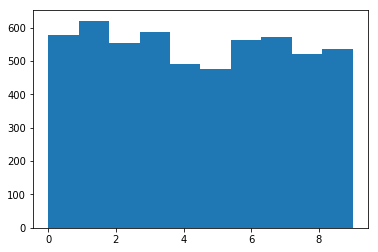

In [22]:
plt.hist(Labels[0:5500],10)